In [3]:
import pandas as pd
import xlsxwriter
import xlwt
import xlrd
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series, DataFrame
import glob
from IPython.display import display, HTML
import seaborn as sns
from itertools import chain
%matplotlib inline
import multiprocessing as mp
print('Number of CPU cores:', mp.cpu_count())

Number of CPU cores: 4


In [58]:
df=pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/causal_data.csv')

In [59]:
print(df)


          PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0              26190       286       70       0      A
1              26190       288       70       0      A
2              26190       289       70       0      A
3              26190       292       70       0      A
4              26190       293       70       0      A
...              ...       ...      ...     ...    ...
36786519    18203921       439      100       1      0
36786520    18203921       439      101       1      0
36786521    18243471       415      101       3      0
36786522    18243476       415      101       3      0
36786523    18244453       345      101       7      0

[36786524 rows x 5 columns]


In [39]:
df.info(memory_usage='deep')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
PRODUCT_ID    1048575 non-null int64
STORE_ID      1048575 non-null int64
WEEK_NO       1048575 non-null int64
display       1048575 non-null object
mailer        1048575 non-null object
dtypes: int64(3), object(2)
memory usage: 156.0 MB


,PRODUCT_ID,STORE_ID,WEEK_NO
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.119648e+04,3.259974e+03,5.440696e+01
std,9.047025e+03,9.141729e+03,2.660981e+01
min,2.619000e+04,2.860000e+02,9.000000e+00
25%,3.384800e+04,3.270000e+02,3.200000e+01
50%,4.141000e+04,3.680000e+02,5.500000e+01
75%,4.785700e+04,4.210000e+02,7.700000e+01
max,6.075400e+04,3.428000e+04,1.010000e+02


In [60]:
df.drop(df.index[1:7000000],inplace=True)
df.drop(df.index[1000000:35786520],inplace=True)

In [61]:
len(df)


1000000

In [62]:
df.to_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/casual 3.csv')
    
df2=pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/casual 3.csv')
print(df2)


        Unnamed: 0  PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0                0       26190       286       70       0      A
1          7000000      869077       366       41       0      A
2          7000001      869077       366       52       0      A
3          7000002      869077       366       56       0      D
4          7000003      869077       366       57       0      A
...            ...         ...       ...      ...     ...    ...
999995     7999994      897158       293       38       0      A
999996     7999995      897158       293       88       0      F
999997     7999996      897158       295       35       0      H
999998     7999997      897158       295       38       0      A
999999     7999998      897158       295       88       0      F

[1000000 rows x 6 columns]


In [63]:
len(df2)

1000000

In [25]:
df2.loc[df2['PRODUCT_ID']==826830]


,Unnamed: 0,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
3570016,5370012,826830,286,17,0,A
3570017,5370013,826830,286,18,0,H
3570018,5370014,826830,286,38,0,A
3570019,5370015,826830,286,39,0,A
3570020,5370016,826830,286,49,0,A
...,...,...,...,...,...,...
3571852,5371848,826830,34280,90,6,A
3571853,5371849,826830,34280,91,6,0
3571854,5371850,826830,34280,92,A,0
3571855,5371851,826830,34280,93,6,0


In [24]:
df2.loc[df2['PRODUCT_ID']==1018588]

,Unnamed: 0,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
10614868,12414864,1018588,286,11,0,A
10614869,12414865,1018588,286,37,0,A
10614870,12414866,1018588,288,11,0,A
10614871,12414867,1018588,288,37,0,A
10614872,12414868,1018588,289,11,0,A
...,...,...,...,...,...,...
10615345,12415341,1018588,32004,42,1,0
10615346,12415342,1018588,34007,91,1,0
10615347,12415343,1018588,34007,92,1,0
10615348,12415344,1018588,34007,93,1,0


In [4]:
transaction_data = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/transaction data.csv')
coupon = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/coupon.csv')
coupon_redempt = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/coupon_redempt.csv')
campaign_table = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/campaign_table.csv')
product = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/product.csv')
hh_demographic = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/hh_demographic.csv')
campaign_desc = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/campaign_desc.csv')
causal_data = pd.read_csv('/Users/check4068/Desktop/算法营销作业/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/casual 3.csv')

In [6]:
campaign_table.info()
campaign_desc.info()
causal_data.info()
coupon.info()
coupon_redempt.info()
hh_demographic.info()
product.info()
transaction_data.info()
campaign_desc = campaign_desc.dropna()
campaign_table = campaign_table.dropna()
causal_data = causal_data.dropna()
coupon = coupon.dropna()
coupon_redempt = coupon_redempt.dropna()
hh_demographic = hh_demographic.dropna()
product = product.dropna()
transaction_data = transaction_data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
DESCRIPTION      7208 non-null object
household_key    7208 non-null int64
CAMPAIGN         7208 non-null int64
dtypes: int64(2), object(1)
memory usage: 169.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
DESCRIPTION    30 non-null object
CAMPAIGN       30 non-null int64
START_DAY      30 non-null int64
END_DAY        30 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
Unnamed: 0    1000000 non-null int64
PRODUCT_ID    1000000 non-null int64
STORE_ID      1000000 non-null int64
WEEK_NO       1000000 non-null int64
display       1000000 non-null object
mailer        1000000 non-null object
dtypes: int64(4), object(2)
memory usage: 45.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 en

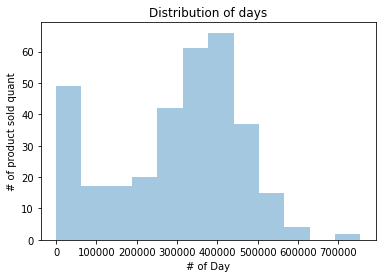

In [5]:
a1 = transaction_data.groupby(by=['DAY']).agg({'QUANTITY':'sum'})
a1.head()
p1 = sns.distplot(a1, kde=False, hist=True)
p1.set(title='Distribution of days',
       xlabel='# of Day', 
       ylabel='# of product sold quant');

In [8]:
a=transaction_data['QUANTITY'>=3]
a.head()

TypeError: '>=' not supported between instances of 'str' and 'int'

NameError: name 'p2' is not defined

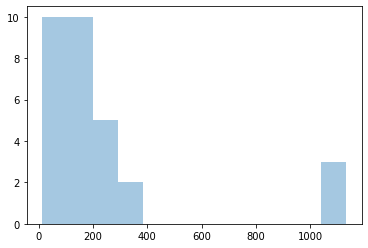

In [8]:
a2 = campaign_table.groupby(by=['CAMPAIGN']).agg({'household_key':'count'})
a2.head()
p1 = sns.distplot(a2, kde=False, hist=True)
p2.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

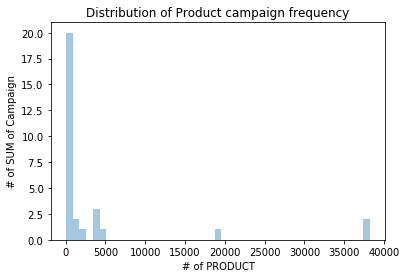

In [9]:
a3 = coupon.groupby(by=['CAMPAIGN']).agg({'PRODUCT_ID':'count'})
a3.head()
p3 = sns.distplot(a3, kde=False, hist=True)
p3.set(title='Distribution of Product campaign frequency',
       xlabel='# of PRODUCT', 
       ylabel='# of SUM of Campaign');

In [131]:
merge1 = coupon.merge(coupon_redempt, on=['COUPON_UPC'], how='inner')
merge1.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN_x,household_key,DAY,CAMPAIGN_y
0,10000089064,27754,9,321,446,9
1,10000089064,27754,9,1773,439,9
2,10000089064,243186,9,321,446,9
3,10000089064,243186,9,1773,439,9
4,10000089064,872316,9,321,446,9
